**Abstract Factory** is a creational design pattern that lets you produce families of related objects without specifying their concrete classes.

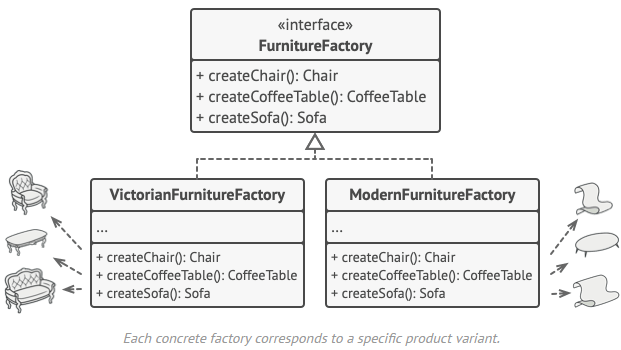

**Applicability**

- **Use the Abstract Factory when your code needs to work with various families of related products, but you don’t want it to depend on the concrete classes of those products—they might be unknown beforehand or you simply want to allow for future extensibility.**
> The Abstract Factory provides you with an interface for creating objects from each class of the product family. As long as your code creates objects via this interface, you don’t have to worry about creating the wrong variant of a product which doesn’t match the products already created by your app.

- **Consider implementing the Abstract Factory when you have a class with a set of Factory Methods that blur its primary responsibility.**
> In a well-designed program each class is responsible only for one thing. When a class deals with multiple product types, it may be worth extracting its factory methods into a stand-alone factory class or a full-blown Abstract Factory implementation.


In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod


class AbstractFactory(ABC):
    """
    The Abstract Factory interface declares a set of methods that return
    different abstract products. These products are called a family and are
    related by a high-level theme or concept. Products of one family are usually
    able to collaborate among themselves. A family of products may have several
    variants, but the products of one variant are incompatible with products of
    another.
    """
    @abstractmethod
    def create_product_a(self) -> AbstractProductA:
        pass

    @abstractmethod
    def create_product_b(self) -> AbstractProductB:
        pass


class ConcreteFactory1(AbstractFactory):
    """
    Concrete Factories produce a family of products that belong to a single
    variant. The factory guarantees that resulting products are compatible. Note
    that signatures of the Concrete Factory's methods return an abstract
    product, while inside the method a concrete product is instantiated.
    """

    def create_product_a(self) -> AbstractProductA:
        return ConcreteProductA1()

    def create_product_b(self) -> AbstractProductB:
        return ConcreteProductB1()


class ConcreteFactory2(AbstractFactory):
    """
    Each Concrete Factory has a corresponding product variant.
    """

    def create_product_a(self) -> AbstractProductA:
        return ConcreteProductA2()

    def create_product_b(self) -> AbstractProductB:
        return ConcreteProductB2()


class AbstractProductA(ABC):
    """
    Each distinct product of a product family should have a base interface. All
    variants of the product must implement this interface.
    """

    @abstractmethod
    def useful_function_a(self) -> str:
        pass


"""
Concrete Products are created by corresponding Concrete Factories.
"""


class ConcreteProductA1(AbstractProductA):
    def useful_function_a(self) -> str:
        return "The result of the product A1."


class ConcreteProductA2(AbstractProductA):
    def useful_function_a(self) -> str:
        return "The result of the product A2."


class AbstractProductB(ABC):
    """
    Here's the the base interface of another product. All products can interact
    with each other, but proper interaction is possible only between products of
    the same concrete variant.
    """
    @abstractmethod
    def useful_function_b(self) -> None:
        """
        Product B is able to do its own thing...
        """
        pass

    @abstractmethod
    def another_useful_function_b(self, collaborator: AbstractProductA) -> None:
        """
        ...but it also can collaborate with the ProductA.

        The Abstract Factory makes sure that all products it creates are of the
        same variant and thus, compatible.
        """
        pass


"""
Concrete Products are created by corresponding Concrete Factories.
"""


class ConcreteProductB1(AbstractProductB):
    def useful_function_b(self) -> str:
        return "The result of the product B1."

    """
    The variant, Product B1, is only able to work correctly with the variant,
    Product A1. Nevertheless, it accepts any instance of AbstractProductA as an
    argument.
    """

    def another_useful_function_b(self, collaborator: AbstractProductA) -> str:
        result = collaborator.useful_function_a()
        return f"The result of the B1 collaborating with the ({result})"


class ConcreteProductB2(AbstractProductB):
    def useful_function_b(self) -> str:
        return "The result of the product B2."

    def another_useful_function_b(self, collaborator: AbstractProductA):
        """
        The variant, Product B2, is only able to work correctly with the
        variant, Product A2. Nevertheless, it accepts any instance of
        AbstractProductA as an argument.
        """
        result = collaborator.useful_function_a()
        return f"The result of the B2 collaborating with the ({result})"


def client_code(factory: AbstractFactory) -> None:
    """
    The client code works with factories and products only through abstract
    types: AbstractFactory and AbstractProduct. This lets you pass any factory
    or product subclass to the client code without breaking it.
    """
    product_a = factory.create_product_a()
    product_b = factory.create_product_b()

    print(f"{product_b.useful_function_b()}")
    print(f"{product_b.another_useful_function_b(product_a)}", end="")


if __name__ == "__main__":
    """
    The client code can work with any concrete factory class.
    """
    print("Client: Testing client code with the first factory type:")
    client_code(ConcreteFactory1())

    print("\n")

    print("Client: Testing the same client code with the second factory type:")
    client_code(ConcreteFactory2())

Client: Testing client code with the first factory type:
The result of the product B1.
The result of the B1 collaborating with the (The result of the product A1.)

Client: Testing the same client code with the second factory type:
The result of the product B2.
The result of the B2 collaborating with the (The result of the product A2.)